## Poročilo vaja 4.2
#### Analiza variance: stopnja gibljivosti študentov glede na trajanje treninga in spol

Izvajamo eksperimentalno študijo, kjer ugotavljamo stopnjo gibljivosti študentov glede na trajanje treninga in spol. Imamo 48 študentov (24M-24Ž), ki jih razdelimo v tri skupine, 1. skupina vadi en teden. 2. skupina 2 tedna, 3. skupina 3 tedne. Podatki so zbrani v tabeli.
1. Uredite podatke tako, da boste lahko izvedli analizo.
2. Izvedite opisno statistiko in jo opremite z ustreznimi grafi. Izvedite ustrezno statistično analizo.
3. Poročajte metodologijo in komentirajte rezultate.

#### 1. Ureditev podatkov

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

path = os.getcwd()
df = pd.read_csv(os.path.join(path, 'data\\flexibility.csv'), delimiter=';')
df = df.drop(columns='id')
df = df.rename(columns={'female': 'gender'})
df['gender'] = df['gender'].map({0: 'male', 1: 'female'})

In [2]:
# shapiro-wilk za določitev normalnosti porazdelitve
print('Shapiro-Wilk test of normality:')
for gender in df.gender.unique():
    for group in df.group.unique():
        data = df[(df.gender == gender) & (df.group == group)]['flexibility']
        stat, p = shapiro(data)
        print(f' {gender}, {group}: {p:.2f}')

Shapiro-Wilk test of normality:
 female, 1: 0.92
 female, 2: 0.28
 female, 3: 0.78
 male, 1: 0.70
 male, 2: 0.14
 male, 3: 0.72


P vrednost shapiro-Wilk testa je večja od mejne vrednosti 0.05 iz česar lahko predpostavimo, da so podatki o gibljivosti normalno porazdeljeni. Podatke smo prav tako razdelili na dve skupini, torej bomo za analizo podatkov uporabili dvosmerno ANOVO.

#### 2. Opisna statistika z grafi in ustrezna statistična analiza.

In [4]:
display(df.groupby(['gender']).describe().drop(columns='group').style.format('{:.2f}'))

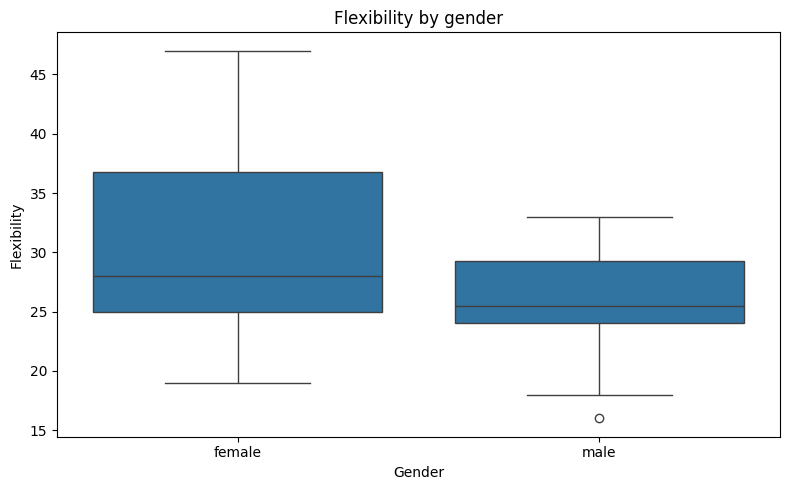

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='flexibility', data=df);
plt.title('Flexibility by gender')
plt.xlabel('Gender')
plt.ylabel('Flexibility')
plt.tight_layout()
plt.show()

Iz grafa in tabele je razvidno, da so ženske bolj gibljive od moških.

In [8]:
display(df.groupby(['group']).describe().style.format('{:.2f}'))

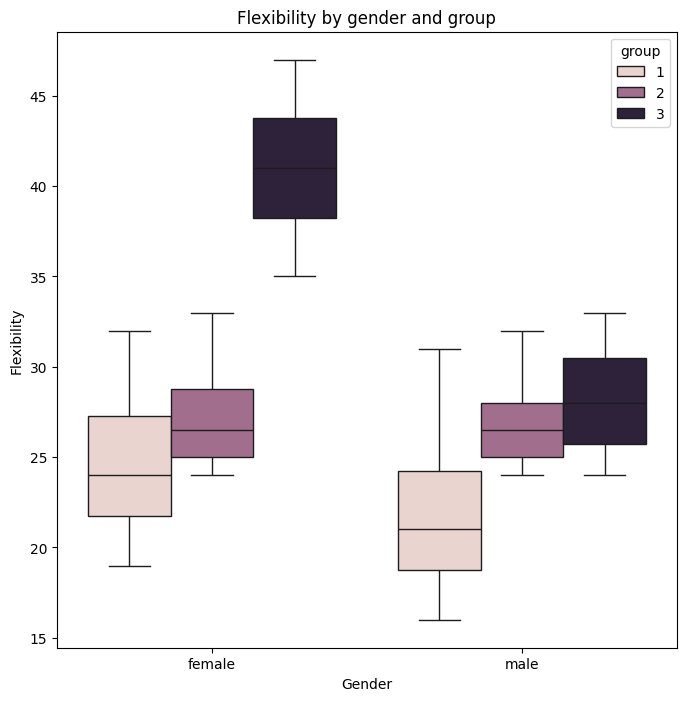

In [60]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='gender', y='flexibility', data=df, hue='group');
plt.title('Flexibility by gender and group')
plt.xlabel('Gender')
plt.ylabel('Flexibility')
plt.show()

Iz tega grafa lahko vidimo, da so ženske, ki so trenirale tri tedne precej bolj gibljive od ženski, ki so trenirale 1 ali 2 tedna. Tudi pri moških lahko vidimo pozitiven trend v gibljivosti glede na dolžino izvajanja vadbe.

Sedaj izvedemo dvosmerno ANOVO.

In [74]:
df['gender'] = df['gender'].astype('category')
df['group'] = df['group'].astype('category')

model = smf.ols('flexibility ~ C(gender) + C(group)', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

,sum_sq,df,F,PR(>F)
C(gender),330.75,1.0,14.987642,3.548813e-04
C(group),1065.50,2.0,24.141092,8.382353e-08
Residual,971.00,44.0,NaN,NaN


**Interpretacija:** Iz tabele rezultatov dvostranske ANOVE lahko razberemo, da obstajajo statistično značilne razlike v gibljivosti med spoloma in med skupinami. Izvedemo post-hoc Tukey HSD analizo, da ugotovimo med katerimi skupinami obstajajo statistično značilne razlike.

In [73]:
df['interaction'] = df['group'].astype(str) + '-' + df['gender']
tukey = pairwise_tukeyhsd(endog=df['flexibility'],
                          groups=df['group'],
                          alpha=0.05)
display(tukey.summary())

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,4.0,0.1005,-0.6087,8.6087,False
1,3,11.375,0.0,6.7663,15.9837,True
2,3,7.375,0.001,2.7663,11.9837,True


#### 3. Metodologija

Primerjali smo vpliv vadbe na gibljivost moških in žensk. Gibljivost je podana s številom. Višje kot je število večja je gibljivost. Nomralnost smo preverjali s Shapiro-Wilk testom. Razlike med skupinami smo preverjali z dvosmerno ANOVO in post-hoc Tukey HSD analizo, da smo ugotovili med katerimi skupinami je statistično značilna razlika. Meja statistične značilnosti je p<0,05. Statistično analizo smo izvajali v Pythonu z uporabo knjižnic scipy in statsmodels.

**Rezultati:** Med prvo in drugo skupino ni statistično značilnih razlik, med drugo in tretjo ter prvo in tretjo pa obstajajo statistično značilne razlike. 

**Zaključek analize:** Študentke so bolj gibljive od študentov, prav tako pa so statistično značilno bolj gibljivi tisti študenti, ki izvajajo trening gibljivosti vsaj dva tedna.